# Initial data analysis

At this point we have the demographics summed up, as well as the hotels merged together, with all the data possible given the circumstances.

We should have a look at it before implementing any recommendation system or preparing the artificial users for the cold start.

First, let's look at the demographics.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dfraw = pd.read_csv('Demographics_best.csv',index_col=False)
dfraw.head()

In [2]:
dfraw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33120 entries, 0 to 33119
Data columns (total 20 columns):
ZIP code                   33120 non-null int64
Total population           33120 non-null int64
Total pop percent          33120 non-null float64
M – U20                    33120 non-null object
M 20-30                    33120 non-null object
M 30-40                    33120 non-null object
M 40-50                    33120 non-null object
M 50-60                    33120 non-null object
M O60                      33120 non-null object
F – U20                    33120 non-null float64
F 20-30                    33120 non-null object
F 30-40                    33120 non-null object
F 40-50                    33120 non-null object
F 50-60                    33120 non-null object
F O60                      33120 non-null float64
Average household size     33120 non-null float64
Average family size        33120 non-null float64
Avg household income       33120 non-null object
perc25

In [3]:
for serie in dfraw.columns.tolist():
    dfraw[serie] = pd.to_numeric(dfraw[serie], errors='coerce')

dfraw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33120 entries, 0 to 33119
Data columns (total 20 columns):
ZIP code                   33120 non-null int64
Total population           33120 non-null int64
Total pop percent          33120 non-null float64
M – U20                    32976 non-null float64
M 20-30                    32976 non-null float64
M 30-40                    32976 non-null float64
M 40-50                    32976 non-null float64
M 50-60                    32976 non-null float64
M O60                      32976 non-null float64
F – U20                    33120 non-null float64
F 20-30                    32976 non-null float64
F 30-40                    32976 non-null float64
F 40-50                    32976 non-null float64
F 50-60                    32976 non-null float64
F O60                      33120 non-null float64
Average household size     33120 non-null float64
Average family size        33120 non-null float64
Avg household income       32540 non-null flo

In [4]:
dfraw_nona = dfraw.dropna()
dfraw_nona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32538 entries, 0 to 33119
Data columns (total 20 columns):
ZIP code                   32538 non-null int64
Total population           32538 non-null int64
Total pop percent          32538 non-null float64
M – U20                    32538 non-null float64
M 20-30                    32538 non-null float64
M 30-40                    32538 non-null float64
M 40-50                    32538 non-null float64
M 50-60                    32538 non-null float64
M O60                      32538 non-null float64
F – U20                    32538 non-null float64
F 20-30                    32538 non-null float64
F 30-40                    32538 non-null float64
F 40-50                    32538 non-null float64
F 50-60                    32538 non-null float64
F O60                      32538 non-null float64
Average household size     32538 non-null float64
Average family size        32538 non-null float64
Avg household income       32538 non-null flo

Cool, it looks nice and clean... and we have with and without nan's just in case. Lt's plot dependences and try to group the zipcodes in demographics to reduce burden afterwards and sinthesize the data

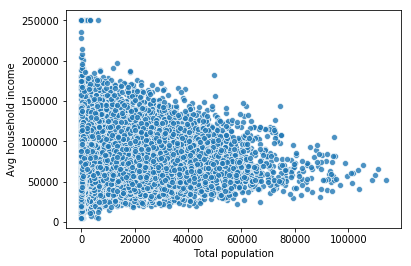

In [11]:
ax = sns.scatterplot(x="Total population", y="Avg household income", data=dfraw_nona, alpha=0.8)
#ax.set(xscale="log", yscale="log")
plt.show()

Data selection:

Let's use: ZIP, TotalPop, M20-30, F20-30, MO60, FO60, HouseSize, AvgIncome

In [14]:
subdf = dfraw_nona[['ZIP code','Total population','M 20-30','F 20-30','M O60','F O60','Average household size','Avg household income']]
subdf.columns= ['ZIP', 'TotalPop', 'M20-30', 'F20-30', 'MO60', 'FO60', 'HouseSize', 'AvgIncome']
subdf.head()

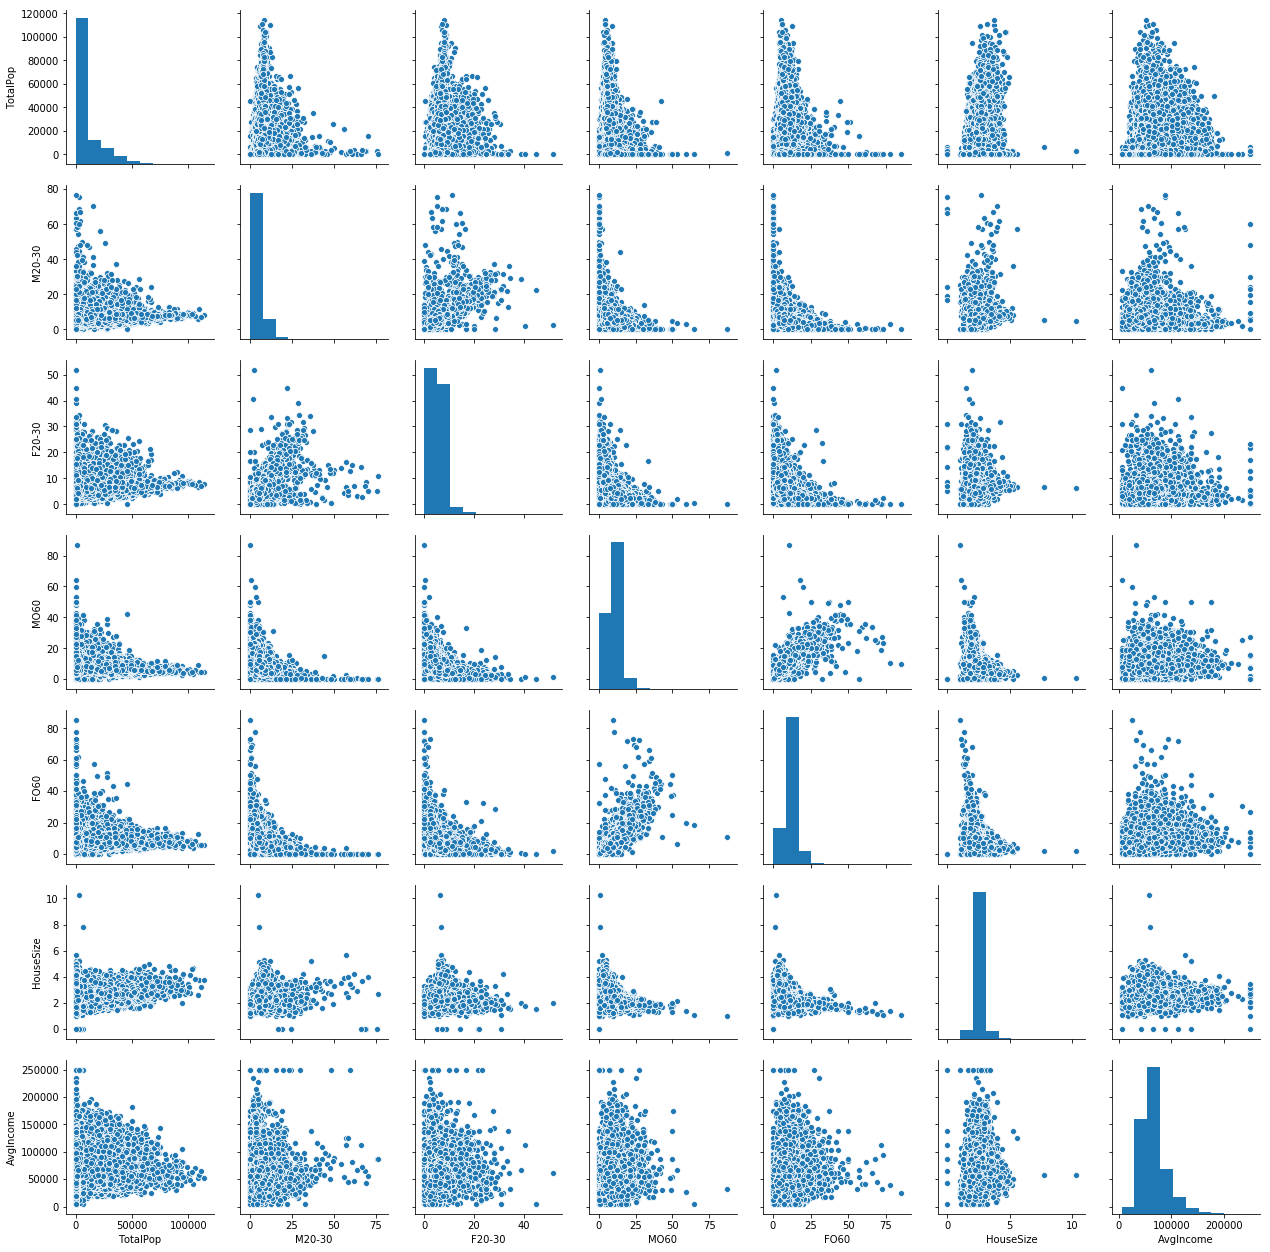

In [16]:
sns.pairplot(subdf[['TotalPop', 'M20-30', 'F20-30', 'MO60', 'FO60', 'HouseSize', 'AvgIncome']])
plt.show()

It seems that the gender correlates for either elder and the yourger areas. So it seems that the gender does not play a significant role. Age may be more important...

I'll therefore cluster dropping the Male columns as well!

Since the data is very densely clustered, I probably want MeanShift
http://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html#sklearn.cluster.MeanShift



In [17]:
df2cluster = subdf[['TotalPop', 'F20-30', 'FO60', 'HouseSize', 'AvgIncome']]

from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(df2cluster, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(df2cluster)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 3


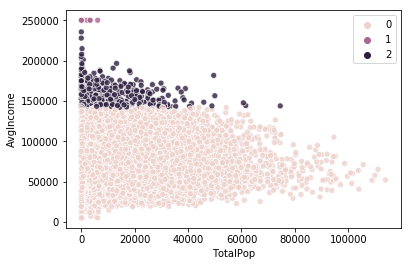

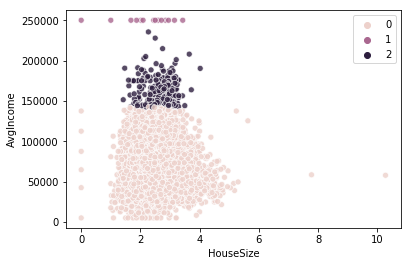

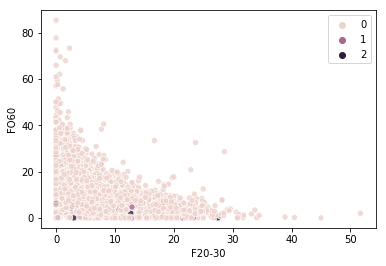

In [21]:
ax = sns.scatterplot(x="TotalPop", y="AvgIncome", data=df2cluster, hue=labels, alpha=0.8)
plt.show()

ax = sns.scatterplot(x="HouseSize", y="AvgIncome", data=df2cluster, hue=labels, alpha=0.8)
plt.show()

ax = sns.scatterplot(x='F20-30', y='FO60', data=df2cluster, hue=labels, alpha=0.8)
plt.show()

Ugh I don't think it makes the sense I want... am I skipping something?

Lets run all... a ver

In [28]:
bandwidth = estimate_bandwidth(dfraw_nona, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(dfraw_nona[['Total population', 'Total pop percent', 'M – U20',
       'M 20-30', 'M 30-40', 'M 40-50', 'M 50-60', 'M O60', 'F – U20',
       'F 20-30', 'F 30-40', 'F 40-50', 'F 50-60', 'F O60',
       'Average household size', 'Average family size', 'Avg household income',
       'perc25 household income', 'perc75 household income']])
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 5


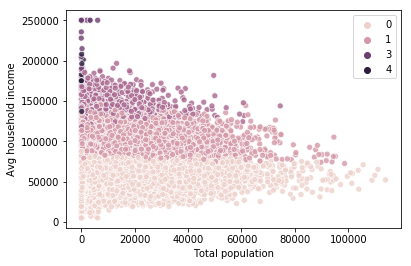

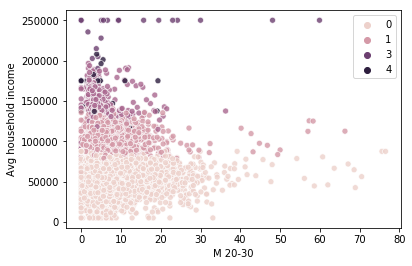

In [30]:
ax = sns.scatterplot(x='Total population', y='Avg household income', data=dfraw_nona, hue=labels, alpha=0.8)
plt.show()
#

ax = sns.scatterplot(x='M 20-30', y='Avg household income', data=dfraw_nona, hue=labels, alpha=0.8)
plt.show()

In [27]:
dfraw_nona.columns

Index(['ZIP code', 'Total population', 'Total pop percent', 'M – U20',
       'M 20-30', 'M 30-40', 'M 40-50', 'M 50-60', 'M O60', 'F – U20',
       'F 20-30', 'F 30-40', 'F 40-50', 'F 50-60', 'F O60',
       'Average household size', 'Average family size', 'Avg household income',
       'perc25 household income', 'perc75 household income'],
      dtype='object')